In [1]:
import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from twitter.models import *
import parliament.models as pms

from django.db.models import Sum, Count
from django.db.models.fields import DateField
from django.db.models.functions import Cast
import textwrap as tw
import datetime

In [2]:
# Number of replies
Status.objects.filter(in_reply_to_status__isnull=False).count()

1339715

In [3]:
# Number of tweets by parliamentarians
pt = Status.objects.filter(author__monitoring=True)
pt.count()

1299593

In [4]:
# Coal tweets by parliamentarians
kp = Status.objects.filter(author__monitoring=True,text__icontains="Kohle")
kp.count()

7279

In [5]:
# Replies to coal tweets by parliamentarians
Status.objects.filter(in_reply_to_status__in=kp).count()

1083

In [6]:
# Replies from non-parliamentarians to coal tweets by parliamentarians
Status.objects.filter(in_reply_to_status__in=kp,author__monitoring=False).count()

966

In [7]:
# Coal tweets by parliamentarians that were retweeted 
kp.filter(retweeted_by__isnull=False).count()

133

In [8]:
# Coal tweets that were retweeted by parliamentarians
statuses = Status.objects.filter(
    retweeted_by__monitoring=True,
    text__icontains="kohle"
)

statuses.count()

1055

In [26]:
status_rts = statuses.annotate(
    n=Count('retweeted_by__pk')
)
for s in status_rts.order_by('-n').values('n','text')[:10]:
    print("\n##\n")
    print(s['text'])
    print(f"retweeted by {s['n']} parliamentarians")


##

Der #Golfstrom hat sich seit Mitte des 20. Jahrhunderts um etwa 15 Prozent verlangsamt. Erlahmt er weiter, hat es direkte Folgen für unser #Klima in #Europa.
Doch statt den #Kohleausstieg unverzüglich anzugehen, schiebt die #GroKo die Entscheidung in eine Kommission ab. https://t.co/S951ZgbGVZ
retweeted by 7 parliamentarians

##

Die #Klimakrise wartet nicht. Wir müssen den #Kohleausstieg jetzt einleiten. Macht das deutlich und kommt mit uns auf die Straße! Am 24. Juni in #Berlin um 12 Uhr vor dem Kanzleramt. Wir zählen auf euch! #StopKohle https://t.co/OgoA2yU9NS https://t.co/uq4fUevkNN
retweeted by 6 parliamentarians

##

Auch ohne die 20 dreckigsten Kohlekraftwerke ist die deutsche Energieversorgung sicher und die Preise bleiben stabil. #Kohleausstieg #Sondierung #Jamaika https://t.co/SEm3mIAuUA
retweeted by 6 parliamentarians

##

Die Phantasien des AfD-Vorsitzenden Gauland reichen über den Sturz der Kanzlerin hinaus. Das darf man den Brandstiftern im Biedermann-Sakko nicht du

In [27]:
# Which parliamentarians tweet the most about coal

byauth = kp.filter(author__person__isnull=False).values('author__person').annotate(
    n = Count('pk')
).order_by('-n').values(
    'author__person__clean_name',
    'author__person__party__name',
    'author__person__party__colour',
    'n')

In [29]:
adf = pd.DataFrame.from_dict([
    {
        "person": x['author__person__clean_name'],
        "tweets": x['n'],
        "party": x['author__person__party__name'],
        "col": x['author__person__party__colour']
    } 
    for x in byauth
])
adf.head(50)

,col,party,person,tweets
0,#64A12D,gruene,Dr. Julia Verlinden,466
1,#64A12D,gruene,Oliver Krischer,366
2,#64A12D,gruene,Annalena Baerbock,279
3,#8C3473,linke,Lorenz Gösta Beutin,207
4,#8C3473,linke,Hubertus Zdebel,140
5,#64A12D,gruene,Jürgen Trittin,123
6,#64A12D,gruene,Britta Haßelmann,103
7,#64A12D,gruene,Stephan Kühn (Dresden),97
8,#8C3473,linke,Sabine Leidig,88
9,#64A12D,gruene,Katrin Göring-Eckardt,67


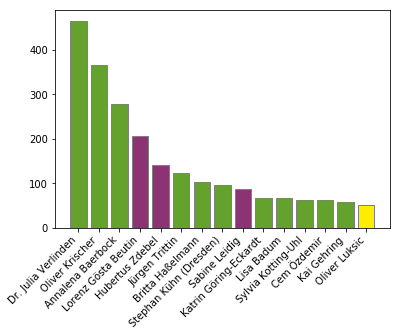

In [14]:
fig, ax = plt.subplots()

pdf = adf.head(15)

ax.bar(pdf.index,pdf['tweets'],color=pdf['col'],linewidth=1,edgecolor="grey")
ax.set_xticks(pdf.index)
ax.set_xticklabels(pdf['person'])
plt.xticks(rotation=45,ha="right")
#ax.tick_params(axis='x', rotation=45)

plt.show()

In [15]:
# Which parliamentarians tweet the most about coal

bypart = kp.filter(author__person__isnull=False).values('author__person__party').annotate(
    n = Count('pk')
).order_by('-n').values(
    'author__person__party__name',
    'author__person__party__colour',
    'n'
)

bypart

<QuerySet [{'author__person__party__name': 'gruene', 'author__person__party__colour': '#64A12D', 'n': 2498}, {'author__person__party__name': 'linke', 'author__person__party__colour': '#8C3473', 'n': 736}, {'author__person__party__name': 'fdp', 'author__person__party__colour': '#FFED00', 'n': 365}, {'author__person__party__name': 'spd', 'author__person__party__colour': '#EB001F', 'n': 302}, {'author__person__party__name': 'cducsu', 'author__person__party__colour': '#000000', 'n': 182}, {'author__person__party__name': 'afd', 'author__person__party__colour': '#0095e0', 'n': 121}, {'author__person__party__name': 'parteilos', 'author__person__party__colour': None, 'n': 5}]>

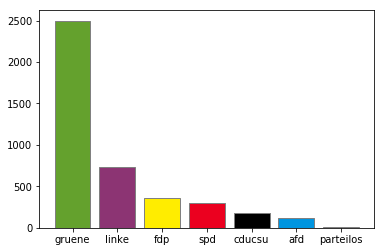

In [16]:
for x in bypart:
    if x['author__person__party__colour'] == None:
        x['author__person__party__colour'] = "white"
pdf = pd.DataFrame.from_dict([
    {
        "tweets": x['n'],
        "party": x['author__person__party__name'],
        "col": x['author__person__party__colour']
    } 
    for x in bypart
])

fig, ax = plt.subplots()

ax.bar(pdf.index,pdf['tweets'],color=pdf['col'],edgecolor="grey")
ax.set_xticks(pdf.index)
ax.set_xticklabels(pdf['party'])

plt.savefig('../plots/twitter/party_kohle_tweets.png')
plt.show()

In [17]:
## Tweets that Lisa Badum (Grüne) sent in reply to others

lb = pms.Person.objects.get(surname="Badum")

Status.objects.filter(
    author__person=lb,
    in_reply_to_status__isnull=False
).count()


206

In [18]:
## Tweets (so far collected) sent in reply to Lisa Badum

lb = pms.Person.objects.get(surname="Badum")

Status.objects.filter(
    in_reply_to_status__author__person=lb
).count()

248

In [19]:
## Tweets about coal that Lisa Badum (Grüne) sent in reply to others

lb = pms.Person.objects.get(surname="Badum")

lbcoalreplies = Status.objects.filter(
    author__person=lb,
    in_reply_to_status__isnull=False,
    text__icontains="kohle"
) | Status.objects.filter(
    author__person=lb,
    in_reply_to_status__isnull=False,
    in_reply_to_status__text__icontains="kohle"
)

print(lbcoalreplies.count())

for s in lbcoalreplies:
    print()
    print(s.in_reply_to_status.text)
    print(s.text)


19

Genau:
1. Rodung für Kohleabbau nicht tolerierbar.
2. Stärker kommunizieren dass #RWE der Schuldige.
3. Polizeigewalt wie ua gestern geht gar nicht!
#HambacherForst #HambiBleibt https://t.co/WtYGv9fZYL
@news_rapha RWE und auch Merkel, die sich einschalten müsste!

An dem was die Nachrichten dazu gebracht hatten, aussetzen hat grün in NRW lange mitregiert und es gab nichts zum Kohleausstieg in ba-wue gibt es einen Ministerpräsident der beim Diesel auf die Bremse tritt Parteitag der grünen und einen ob der Fahrverbote durch Tricks verhindert https://t.co/WfOC3JxqkK
@CathrinRamelow Und inwiefern sind uns andere Parteien voraus ?

@badulrichmartha Es gibt das schöne Sprichwort wenn du mit einem Finger auf jemanden zeigst, weißen 4 Finger auf dich. Vielleicht sollten sie es Mal damit probieren das Problem zu beschreiben und Lösungen aufzuzeigen statt nur zu poebeln
@CathrinRamelow Die Lösungen liegen doch vor: schmutzigste Kohlekraftwerke abschalten und die schrittweise Ersetzun… https:

In [30]:
## replies about coal to Lisa Badum

lb = pms.Person.objects.get(surname="Badum")

lbcoalreplies = Status.objects.filter(
    in_reply_to_status__author__person=lb,
    text__icontains="kohle"
) | Status.objects.filter(
    in_reply_to_status__author__person=lb,
    in_reply_to_status__text__icontains="kohle"
)

print(lbcoalreplies.count())

for s in lbcoalreplies:
    print('')
    print(s.author)
    print(s.text)

93

Jim Panse - @Jim1panse
@badulrichmartha @GoeringEckardt Bäume werden zu Kohle....guter Synergieeffekt....oder auf Neudeutsch: win-win-Situation

Wolfgang Ksoll - @woksoll
@badulrichmartha @GoeringEckardt Ach, sind die Grünen sich da schon einig? 2016 in der NRW Regierung war rot/grün gegenteiliger Meinung. Das Beste ist, man hört nicht auf die Grünen und arbeitet darauf hin, dass Braunkohleverbrennung gestoppt wird. Hambach ist Tertiärproblem. Umfaller

Luca Brunsch 🌍 - @LucaBrunsch
@badulrichmartha Sauber sicher nicht, wenn man sich Methan bei Förderung anguckt: https://t.co/7zPpqf1UNj Aber das Gaskraftwerk als Technologie ist trotzdem wichtig, schließlich kann man auch klimaneutrales, künstliches CH4 oder Biogas verfeuern+anders als Kohle ist es flexibel.

FW Forchheim - @fwfo
@badulrichmartha Noch überraschender: #Seehofer, #CSU ist die Ursache.

#Klimawandel #Energiewende #Kohlekommission #GroKo
https://t.co/ijzy77kpF3

Max_Mel - @Max_Mel1
@badulrichmartha @AngelaMerkeICDU Nebe